<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [56]:
!pip install plotly matplotlib seaborn --quiet

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
!ls 'drive/MyDrive/Colab Notebooks/data/'

application_data.csv.zip	columns_description.csv			    medical-charges.csv
application_data_processed.zip	health_insurance_cross_sell_prediction.csv  supermarket_sales.csv


In [60]:
medical_df =  pd.read_csv("drive/MyDrive/Colab Notebooks/data/medical-charges.csv")

In [61]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


1. Кореляційний аналіз. Можна спробувати використати статистичні методи для оцінки кореляцій між 'charges' та іншими змінними. Наприклад, можна розрахувати коефіцієнт кореляції Пірсона для кількісних змінних (вік, BMI, кількість дітей) та 'charges', щоб побачити, чи є значущі зв'язки.

2. Порівняльний аналіз. Можна провести аналізу середні або медіанні значення 'charges' у різних групах, наприклад, порівнявши курців та некурців, чоловіків та жінок, різні регіони. Це допоможе визначити, які категорії витрачають більше на медичні послуги.

3. Побудувати тренди за віком. Оскільки вік є значним фактором у медичних витратах, можна розробити аналітику, яка показує, як змінюються витрати з віком. Це допоможе зрозуміти, у які періоди життя медичні витрати зростають.

4. Оцінити вплив індексу маси тіла (BMI). Оскільки BMI може впливати на здоров'я, варто аналізувати витрати за різними категоріями BMI (нормальний, надлишковий, ожиріння) для оцінки їх впливу на медичні витрати.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [62]:
medical_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [63]:
medical_df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [64]:
fig = px.histogram(
    medical_df,
    x="charges",
    color="sex",
    facet_col="region",
    marginal="box",  # marginal boxplot for discrete categories
    title="Distribution of Medical Charges by Sex and Region",
    labels={"charges": "Medical Charges ($)"},
    color_discrete_map={'female': 'pink', 'male': 'blue'}
)
fig.show()

Спостережнення:

1.  Гістограми відображають правий розподіл плати за медичне обслуговування в усіх регіонах, вказуючи на те, що, хоча більшість людей мають нижчу плату за медичне обслуговування, є кілька людей із значно високою оплатою, потенційно через складні медичні потреби або надзвичайні ситуації.

2. Сині смужки (чоловічі) і рожеві смужки (жіночі) свідчать про те, що, як правило, чоловіки можуть мати дещо вищі чарджез на вищому кінці розподілу, особливо помітно в таких регіонах, як південний схід і північний схід. Проте обидві статі демонструють схожу загальну картину щодо форми розподілу та ареалу.

3. Про регіонам:
    - **Південний схід**: цей регіон демонструє помітно ширший діапазон чарджів, як з вищою концентрацією нижчих чарджів, так і з більш значними викидами на верхньому кінці. Коробковий графік показує вищі середні збори порівняно з іншими регіонами.
    - **Південно-західний і північно-західний**: ці регіони, здається, мають більш компактний розподіл зборів із меншою кількістю викидів. Середні збори нижчі, ніж на південному сході.
    - **Північний схід**: подібно до південного сходу, північний схід демонструє поширення з більш високими відхиленнями, хоча й не такими вираженими.

4. Граничні коробкові діаграми забезпечують гарний підсумок поширення та викидів у кожному регіоні. Примітно, що південний схід і північний схід мають більш виражені верхні вуси та викиди, що свідчить про те, що екстремальні чарджи частіше трапляються в цих регіонах. Міжквартильний діапазон (середні 50% чарджів) ширший на південному сході, що вказує на більшу мінливість чарджів.

Ці спостереження можуть вказувати на регіональні відмінності у витратах на охорону здоров’я, можливо, через відмінності в політиці охорони здоров’я, вартості життя або поширеності певних проблем зі здоров’ям. Крім того, на дещо вищі тарифи для чоловіків у деяких регіонах може вплинути різна поведінка, яка загрожує здоров’ю, професійні ризики або інші демографічні фактори, чітко не описані в наборі даних.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [65]:
fig_region = px.histogram(
        medical_df,
    x="region",
    color="smoker",
    barmode='group',
    title="Distribution of Regions by Smoking Status",
    labels={"region": "Region"},
    color_discrete_map={'yes': 'red', 'no': 'green'}
)
fig_region.show()

1. кількість некурців значно перевищує кількість курців у всіх регіонах, що свідчить про стабільну тенденцію в усіх областях.
2.По регіонам:
    - **Південний захід і північний захід**: ці регіони мають відносно менший розрив між курцями та некурцями порівняно з південним сходом і північним сходом.
    - **Південно-східний**: у цьому регіоні значно більше як курців, так і некурців, що свідчить про більшу базу населення або потенційно більшу кількість відповідей на опитування з цього регіону.


In [66]:
fig_children = px.histogram(
    medical_df,
    x="children",
    color="smoker",
    barmode='group',
    title="Distribution of Number of Children by Smoking Status",
    labels={"children": "Number of Children"},
    color_discrete_map={'yes': 'red', 'no': 'green'}
)

fig_children.show()

1. Некурців набагато більше в усіх категоріях розміру родини.
2. Більшість людей, курців чи некурців, мають менше трьох дітей.
3.  **Без дітей** - це найпоширеніша категорія для курців, яка, можливо, означає вибір способу життя, пов’язаний із відсутністю дітей або відстроченням планування сім’ї.
4.  **Одна дитина** - також значна кількість курців має одну дитину, але кількість некурців з однією дитиною майже вдвічі перевищує кількість курців.
5. **Двоє або більше дітей** - кількість некурців незмінно домінує зі збільшенням розміру сім’ї. Це може вказувати на те, що некурці мають більше шансів мати великі сім’ї, або це може відображати суспільні норми та обізнаність некурців щодо здоров’я.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [67]:
fig_violin = px.violin(
    medical_df,
    y="charges",
    x="children",
    color="children",
    box=True,
    points="all",
    title="Relationship Between Medical Charges and Number of Children",
    labels={"charges": "Medical Charges ($)", "children": "Number of Children"}
)

fig_violin.show()

1. Діаграми для кожної категорії (від 0 до 5 дітей) демонструють різну щільність і форму, що вказує на відмінності в розподілі зарядів серед сімей різного розміру.
2. Для сімей без дітей розподіл є досить широким з високою щільністю навколо нижчих платіжок, але також значними випадками високих витрат на медичне обслуговування.
3. Рамка всередині кожної скрипкової діаграми висвітлює медіану, квартилі та потенційно будь-які викиди.
4. Середні медичні збори, як правило, дещо зростають від 0 до 1 дитини, але потім демонструють різноманітну картину зі збільшенням кількості дітей.  
3. По кількості дітей:
    - **0 дітей** - існує значний розкид у зборах із багатьма викидами на вищому рівні, що свідчить про те, що особи, які не мають дітей, можуть мати як мінімальні, так і значні медичні витрати.
    - **1 дитина** - розподіл трохи звужується порівняно з тими, у кого немає дітей, з меншою кількістю викидів високого класу, що свідчить про більш уніфікований набір медичних витрат.
    - **2 дітей**: схоже на 1 дитину, але з дещо нижчим середнім значенням і меншою кількістю високих витрат, що вказує на потенційно більш передбачувані медичні витрати.
    - **3 Діти**: Сюжет вужчий і довший, показує меншу варіативність чарджів, але все ще є деякі значні викиди.
    - **4 дітей**: ще менше високих викидів і нижчий середній чардж порівняно з меншою кількістю дітей.
    - **5 дітей**: дуже мало осіб у цій категорії з дуже вузьким розповсюдженням, переважно нижчими та майже без високих чарджів.

4.  Здається, існує загальна тенденція, коли зі збільшенням кількості дітей варіабельність медичних чарджів зменшується, а медіана зміщується трохи нижче. Це може свідчити про те, що сім’ї з більшою кількістю дітей можуть мати більш передбачувані або стабільні витрати на медичне обслуговування, можливо, через постійне медичне обслуговування або плани медичного страхування, які надають перевагу великим сім’ям.

Ці спостереження свідчать про те, що медичні чарджі можуть бути менш мінливими та дещо нижчими в середньому для осіб, які мають більше дітей, можливо, відображаючи різні види медичного страхування або краще управління сімейними витратами на здоров’я.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [68]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [69]:
def estimate_charges(age, w, b):
    return w * age + b

In [70]:
def try_all_parameters_on_one_plot(df, pairs, colors):
    plt.figure(figsize=(12, 8))
    ages = df.age
    target = df.charges

    # Plot actual data points
    plt.scatter(ages, target, color='gray', s=10, alpha=0.5, label='Actual Charges')

    # Plot each set of parameters with a unique color
    for (w, b), color in zip(pairs, colors):
        estimated_charges = estimate_charges(ages, w, b)
        plt.plot(ages, estimated_charges, color=color, alpha=0.9, label=f'Estimate w={w}, b={b}')

    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Comparison of Different Parameter Sets for Estimating Charges')
    plt.legend()
    plt.show()

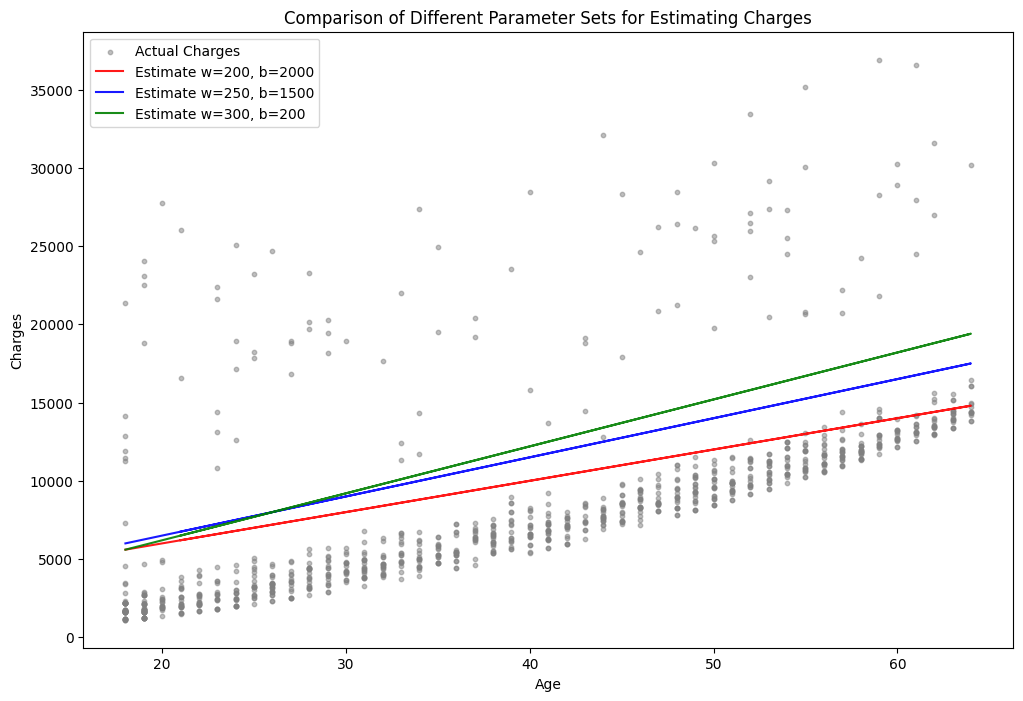

In [50]:
# Define parameter pairs and their corresponding colors
pairs = [(200, 2000), (250, 1500), (300, 200)]
colors = ['red', 'blue', 'green']

# Plot all parameters on one graph
try_all_parameters_on_one_plot(non_smoker_df, pairs, colors)

1. Червона лінія (w=200, b=2000)
Починається з більш високим початковим значенням, що забезпечує кращу відповідність регіонального розподілу сірих точок при молодших віках.
Нахил лінії, однак, здається занадто пологим, щоб адекватно відобразити зростання витрат з віком, особливо для більш старших вікових груп.
2. Синяя лінія (ш=250, ш=1500)
Лінія починається нижче, ніж червона, і має круче нахил, що дозволяє їй краще відповідати середнім і більш високим значенням чарджів в середньому і старшому віці.
Ця лінія є більш ефективною порівняно з червоною, так як вона захоплює більшу частину динаміки збільшення витрат з віком.
3. Зелена лінія (ш=300, б=200)
Починається значно нижче інших ліній, що дозволяє їй перехопити деякі із самих низьких чарджів у початковому віковому діапазоні.
Однак її крутий наклон швидко піднімає її більшу частину даних, що може призвести до переоцінки витрат для старших вікових груп.
**На загал**: Жодна з ліній не ідеально відповідає всім даним, що вказує на можливі обмеження лінійної моделі для цього набору даних. Скоріше за все треба використовувати модель з поліномом 2 порядку:  щось типу charges = a + b * ages + c * ages**2 (але це потреюує перевірки і не складно зробити просто підбором параметрі).
Бо параметры 𝑤  і 𝑏 повинні бути обрані таким чином, щоб мінімізувати різницю між оціночними та реальними чарджами за можливістю у всьому діапазоні віків. Синя лінія, здається, пропонує краще загальне відповідність, хоча і не ідеально. Але всі 3 графіки треба посунути нижче, шоб вони відповідали розподілу.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [72]:
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((predicted - actual) ** 2))

In [73]:
ages = non_smoker_df['age'].values
actual_charges = non_smoker_df['charges'].values

for (w, b), color in zip(pairs, colors):
    predicted_charges = estimate_charges(ages, w, b)
    rmse = calculate_rmse(actual_charges, predicted_charges)
    print(f'RMSE для параметрів w={w} та b={b}: {rmse:.2f}')

RMSE для параметрів w=200 та b=2000: 4971.60
RMSE для параметрів w=250 та b=1500: 5502.55
RMSE для параметрів w=300 та b=200: 5897.24


1. Найнижче значення RMSE серед початкових параметрів було досягнуто для
w=200 і  𝑏 = 2000 з RMSE 4971.60.
2. Значення RMSE зростає для w=250 і b=1500 та ще більше для w=300 і  b=200, що вказує на те, що ці параметри менше підходять для даних.

In [75]:
def find_best_params(ages, actual_charges, initial_w, initial_b, step_w, step_b, tolerance):
    best_w = initial_w
    best_b = initial_b
    best_rmse = calculate_rmse(actual_charges, estimate_charges(ages, best_w, best_b))

    improvement = True
    while improvement:
        improvement = False
        # Можна ще  змінити w та b на step_w і step_b
        for delta_w in [-step_w, step_w]:
            for delta_b in [-step_b, step_b]:
                new_w = best_w + delta_w
                new_b = best_b + delta_b
                new_rmse = calculate_rmse(actual_charges, estimate_charges(ages, new_w, new_b))
                if new_rmse < best_rmse - tolerance:
                    best_rmse = new_rmse
                    best_w = new_w
                    best_b = new_b
                    improvement = True
                    print(f'Нові кращі RMSE: {best_rmse:.2f} with w={best_w}, b={best_b}')

    return best_w, best_b, best_rmse

# Початкові параметри
initial_w = 200
initial_b = 2000
step_w = 50
step_b = 500
tolerance = 0.01

# Знайти найкращі параметри
best_w, best_b, best_rmse = find_best_params(ages, actual_charges, initial_w, initial_b, step_w, step_b, tolerance)
print(f'Знайдені кращі параметри: w={best_w}, b={best_b}, RMSE={best_rmse:.2f}')


Нові кращі RMSE: 4946.09 with w=150, b=2500
Знайдені кращі параметри: w=150, b=2500, RMSE=4946.09


За допомогою методу проб та помилок вдалося знайти ще кращі параметри: w=150 і b=2500 з найнижчим RMSE 4946.09.
Зниження RMSE вказує на те, що ці параметри забезпечують кращу відповідність моделі даним, ніж початково обрані параметри.Але там все ще можна змінювати параметри, тож це не є супер швидкий спосіб перебору

**Загальні висновки**: 1. w та 𝑏 є критичним для мінімізації помилок моделі. Вибір неправильних параметрів може призвести до значних втрат точності.
2. Метод проб та помилок є ефективним інструментом для пошуку кращих параметрів. Цей метод дозволяє поступово покращувати модель, коректуючи параметри на основі отриманих результатів, але все ж таки він потребує часу на перебір.
3.Подальше покращення може бути досягнуто за рахунок більш складних методів оптимізації або використання інших моделей (наприклад, поліноміальна регресія і тд).
**Рекомендації**:
1. Рекомендується дослідити інші моделі, такі як поліноміальна регресія або моделі машинного навчання, щоб побачити, чи можна досягти ще кращої точності.
2. Враховати інші потенційно важливі фактори (наприклад, індекс маси тіла, кількість дітей, регіон), які можуть впливати на медичні витрати, для побудови більш комплексної моделі.
Таким чином, найкращі знайдені параметри для поточної моделі є
w=150 та b=2500, що забезпечує найнижче значення RMSE (4946.09) серед розглянутих варіантів.